In [1]:
#1. Using the dataset “tips.csv” implement k-means clustering technique on two fields “Total bill,” “tip.”

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [3]:
df1 = pd.read_csv("tips.csv.csv")
df1.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

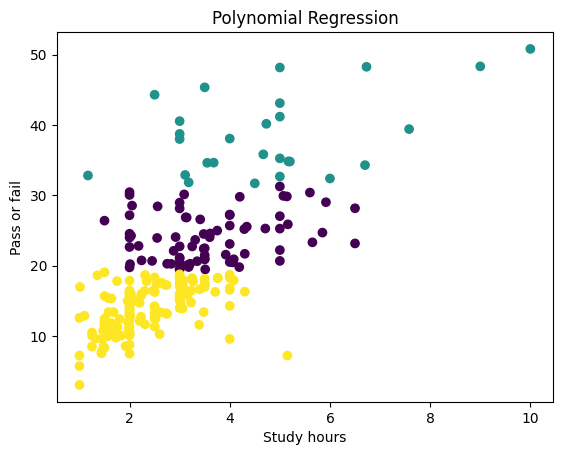

In [4]:
X = 'tip'
Y = 'total_bill'
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300, random_state=42 )
kmeans.fit(df1[[X,Y]])
kmeans.labels_
plt.title("Polynomial Regression")
plt.xlabel("Study hours")
plt.ylabel("Pass or fail")
plt.scatter(df1[X],df1[Y], c=kmeans.labels_)

In [8]:
#2. Use the data set “fruits.csv” and form SVM classification by taking weight and size as the parameter. If you take single parameters does
# the SVM technique differs? Justify.

df_f = pd.read_csv("fruits.csv.csv")
df_f['size'] = df_f['size'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(df_f[['Weight']], df_f['size'],test_size = 0.2, random_state = 1)

In [9]:
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)
Y_pred = classifier.predict(X_test)
y_test_t = pd.DataFrame(y_test, columns=['size'])
test_set = pd.concat([X_test, y_test_t], axis=1)
test_set["Predictions"] = Y_pred
test_set

Weight  size  Predictions
3       72     5            5
16      64     4            4
6       70     5            4
10      73     5            5

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_pred)
print("The confusion Matrix is:")
print(cm)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy of SVM for the given dataset :", accuracy*100, "%")

The confusion Matrix is:
[[1 0]
 [1 2]]

Accuracy of SVM for the given dataset : 75.0 %
